In [34]:
# Hacker statistics: simulated repeated measurments to compute probabilities
import numpy as np
import random
np.random.seed(69)
np.random.randint(2, size=4)

array([0, 1, 1, 1])

In [71]:
n_all_heads = 0
for trial in range(10000):
    heads = sum(np.random.randint(2, size=4))
    if heads == 4:
        n_all_heads += 1
n_all_heads/10000

0.0616

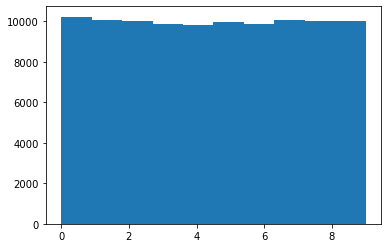

In [87]:
import matplotlib.pyplot as plt
random_numbers = np.empty(100000)
for i in range(100000):
    random_numbers[i] = np.random.randint(10)
plt.hist(random_numbers, bins=10)
plt.show()

### Distribution functions

In [ ]:
# Distrubition functions = mathematical representation of outcomes

In [195]:
# Bernoulli trials follow a binomial distribution
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p and return number of successes."""
    n_success = 0
    for i in range(n):
        random_number = np.random.random()
        if random_number < p:
            n_success += 1
    return n_success

In [160]:
perform_bernoulli_trials(100, 0.05)

4

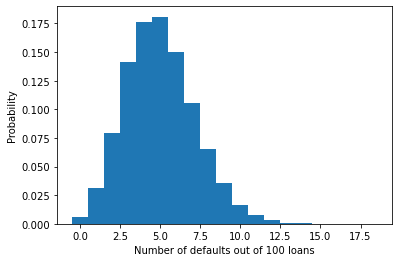

In [170]:
# Bank loans simulation: if probability p of default is 0.05, we might want to know the probability of getting
# certain number of defaults after 100 loans
n_defaults = np.empty(100000)
for i in range(100000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)

bins = np.arange(0, max(n_defaults) + 1.5) - 0.5
plt.hist(n_defaults, density=True, bins=bins)
plt.xlabel('Number of defaults out of 100 loans')
plt.ylabel('Probability')
plt.show()

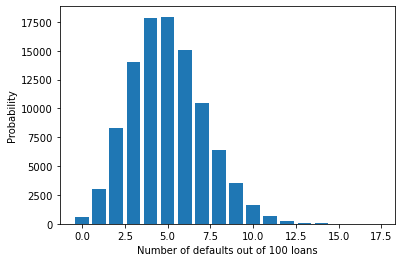

In [139]:
# If we want to use a bar plot, we can use np.unique, which is similar to value_counts() for np.arrays
values, counts = np.unique(n_defaults, return_counts=True)
plt.bar(values, counts)
plt.xlabel('Number of defaults out of 100 loans')
plt.ylabel('Probability')
plt.show()

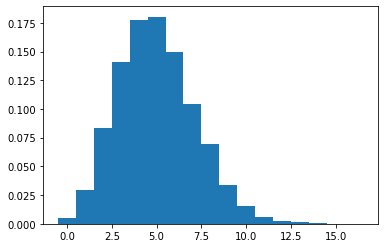

In [179]:
# Bernouli trials can also be performed with the random library!
n_defaults = np.random.binomial(100, 0.05, size=10000)
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5
plt.hist(n_defaults, density=True, bins=bins)
plt.xlabel('Number of defaults out of 100 loans')
plt.ylabel('Probability')
plt.show()

In [193]:
# Define a function ecdf:
def ecdf(array):
    x = np.sort(array)
    n = x.size
    y = np.arange(1, n+1) / n
    return (x, y)

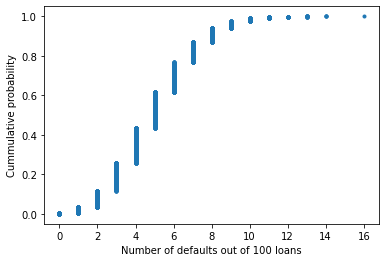

In [194]:
x, y = ecdf(n_defaults)
plt.plot(x, y, marker=".", linestyle="none")
plt.xlabel('Number of defaults out of 100 loans')
plt.ylabel('Cummulative probability')
plt.show()

In [ ]:
# Poisson process: the timing of the next event is completely independent 
# of the previous event happened

# Poisson distribution: limit of binomial distribution for low probability and 
# large number of trials (rare events)

In [196]:
np.random.poisson(5, 10000)

array([4, 3, 6, ..., 5, 9, 1])

In [199]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, 10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], 10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))


Poisson:      10.0443 3.15108513214099
n = 20 Binom: 9.9995 2.222813476205325
n = 100 Binom: 9.978 3.006013306690441
n = 1000 Binom: 10.0096 3.1720825714347347


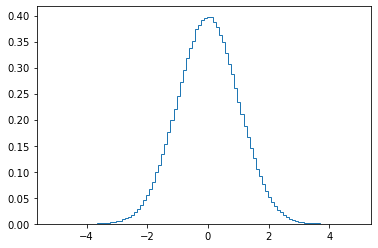

In [212]:
# Normal distribution:
normal_sample = np.random.normal(0, 1, 1000000)
plt.hist(normal_sample, bins=100, density=True, histtype='step')
plt.show()

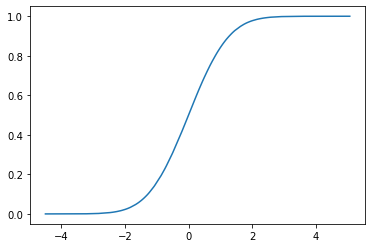

In [211]:
x, y = ecdf(normal_sample)
plt.plot(x, y)
plt.show()